### Shalma Wegsman
### Computational Physics - Fall 2020
# Homework #1

### 1 - Kepler's Third Law

In [2]:
import numpy as np

In [6]:
def OrbitalPeriod(M,r):
    G = 6.673*10**(-11) #m3⋅kg–1⋅s–2
    T = np.sqrt((4*np.pi**2 / (G*M))* r**3)
    return T

Let's find the orbital period for these three planets:

Earth:
r = 1.50×10^11 m

Venus:
r = 1.08 x 10^11 m

Jupiter:
r = 7.786 x 10^11 m

(source: https://nssdc.gsfc.nasa.gov/planetary/factsheet/)

In [8]:
SolarMass = 1.989e30
EarthPeriod = OrbitalPeriod(SolarMass,1.5e11)
VenusPeriod = OrbitalPeriod(SolarMass,1.08e11)
JupiterPeriod = OrbitalPeriod(SolarMass,7.786e11)

print("Earth:",EarthPeriod/(3600*24), " days")
print("Venus:",VenusPeriod/(3600*24), " days")
print("Jupiter:", JupiterPeriod/(3600*24), " days")

Earth: 366.7119482941505  days
Venus: 224.03909264911863  days
Jupiter: 4336.7039041475045  days


### 2 - Quantum Tunneling
(A) Exercise 2.5

In [9]:
def TransmissionReflection(m,E,V):
    hbar = 6.5821e-16 #eV s
    k1 = np.sqrt(2*m*E) / hbar
    k2 = np.sqrt(2*m*(E-V)) / hbar
    T = (4*k1*k2)/(k1+k2)**2
    R = ((k1 - k2)/(k1+k2))**2
    return(T,R)

In [10]:
m = 9.11e-31
E = 10
V = 9
result = TransmissionReflection(m,E,V)
print("T=",result[0])
print("R=",result[1])

T= 0.7301261363877615
R= 0.26987386361223825


(B)

In [11]:
m = 9.11e-31
E = 10
V = []
T = []
R = []

for x in range(11):
    V.append(x)
    result = TransmissionReflection(m,E,x)
    T.append(result[0])
    R.append(result[1])
    
print(V)
print(T)
print(R)

np.savetxt('StepPotential.csv', (V,T,R), delimiter=',')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.0, 0.9993065183904875, 0.9968943799848581, 0.9920908936857081, 0.983866769659335, 0.9705627484771407, 0.9493082760794023, 0.9146067327078852, 0.8541019662496846, 0.7301261363877615, 0.0]
[0.0, 0.000693481609512308, 0.003105620015141866, 0.007909106314291932, 0.01613323034066494, 0.029437251522859424, 0.05069172392059762, 0.08539326729211474, 0.14589803375031554, 0.26987386361223825, 1.0]


### 3 - Madelung Constant for NaCl
(A) Exercise 2.9

In [95]:
def Madelung(x): #max L, input x must be greater than or equal to 1
    new = 0
    V_list = []
    L = 1
    stop = 0
    while L <= x: #from here on, for increasing L we only need to add terms where i,j,k = {-L,+L} 
        if stop ==1:
            break
        V = 0
        L_list = range(-L,L+1)
        for i in L_list:
            for j in L_list:
                for k in L_list:
                    if i ==0 and j ==0 and k ==0:
                        continue
                    else:
                        new = ((-1.)**(i+j+k))*np.sqrt(i**2 + j**2 + k**2)**(-1)
                        V += new
                        if np.abs(new) < np.abs(0.001*V):
                            stop = 1 
        V_list.append(V)
        print("L=",L,V)
        L+= 1
    return(V,"Final L: ",L,V_list)

In [99]:
Result = Madelung(100)
print(Result)

L= 1 -2.1335207792784368
L= 2 -1.516646336266923
L= 3 -1.9125039789591567
L= 4 -1.6192696788703898
L= 5 -1.852535490412281
L= 6 -1.6587422894726997
L= 7 -1.8245442337282207
L= 8 -1.6796412454744765
L= 9 -1.8083381857782097
L= 10 -1.6925789282594415
L= 11 -1.7977689192231834
L= 12 -1.701376603826924
L= 13 -1.7903312603332933
L= 14 -1.7077473493105542
L= 15 -1.7848129886238444
L= 16 -1.7125736768878468
L= 17 -1.7805560328799237
L= 18 -1.7163564762960848
L= 19 -1.7771722974240172
L= 20 -1.719401169453936
L= 21 -1.774418093487493
L= 22 -1.7219045842925453
L= 23 -1.772132689888026
L= 24 -1.7239992785836562
L= 25 -1.7702057807918192
L= 26 -1.7257777927382638
L= 27 -1.7685591492810777
L= 28 -1.7273066909486219
L= 29 -1.7671357897797149
L= 30 -1.7286350779648982
L= 31 -1.7658931743054418
L= 32 -1.7297999712236625
L= 33 -1.7647989308048302
L= 34 -1.730829804413132
L= 35 -1.7638279823314569
L= 36 -1.7317467791831482
L= 37 -1.7629606016851542
L= 38 -1.7325684838555833
L= 39 -1.7621810570467928
L=

(B) Plotting

In [100]:
import pylab

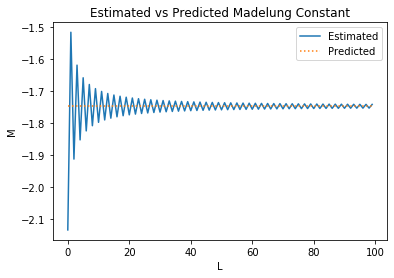

In [113]:
y = Result[3]
x = np.arange(100)

M = [-1.747565]*100

pylab.plot(x,y,label='Estimated')
pylab.plot(x,M,':',label='Predicted')

pylab.xlabel('L')
pylab.ylabel('M')
pylab.title('Estimated vs Predicted Madelung Constant')
pylab.legend(loc='upper right')

### 4 - 2D Motion

In [119]:
from vpython import *

In [137]:
h = 100
v0 = 0
theta = 0
g = 10

t=0
dt=0.01
x = 0
y = h

scene=canvas(width=200,height=200)
ball=sphere(pos=vector(x,y,0),radius=10.,color=color.orange)
while y > 0:
    t += dt
    rate(1./dt)
    x+= v0*(t) * np.cos(theta)
    y+=h + v0*(t)*np.sin(theta) - 0.5*g*t**2
    ball.pos=vector(x,y,0)

<IPython.core.display.Javascript object>

In [146]:
h = 190
v0 = 5
theta = np.pi
g = 10

t=0
dt=0.01
x = 0
y = h

scene=canvas(width=200,height=200)
ball=sphere(pos=vector(x,y,0),radius=5.,color=color.orange)
while y > 0:
    t += dt
    rate(1./dt)
    x+= v0*(t) * np.cos(theta)
    y+=h + v0*(t)*np.sin(theta) - 0.5*g*t**2
    ball.pos=vector(x,y,0)

<IPython.core.display.Javascript object>

In [147]:
h = 200
v0 = 20
theta = np.pi/3
g = 10

t=0
dt=0.01
x = 0
y = h

scene=canvas(width=200,height=200)
ball=sphere(pos=vector(x,y,0),radius=5.,color=color.orange)
while y > 0:
    t += dt
    rate(1./dt)
    x+= v0*(t) * np.cos(theta)
    y+=h + v0*(t)*np.sin(theta) - 0.5*g*t**2
    ball.pos=vector(x,y,0)

<IPython.core.display.Javascript object>